Download: https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

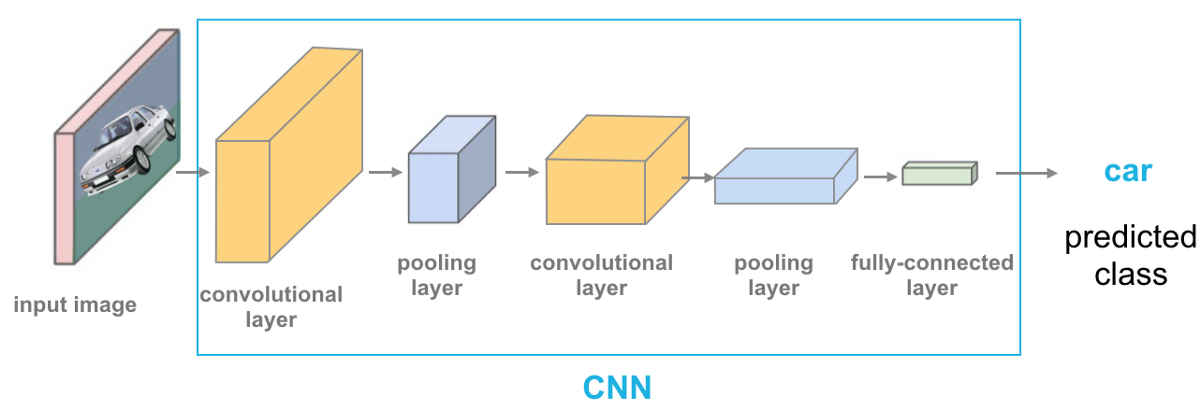

In [32]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
data_path = 'PetImages'
dog_path = os.path.join(data_path, 'Dog')
cat_path = os.path.join(data_path, 'Cat')

In [7]:
def clean(path):
    images = os.listdir(path)
    for image in images:
        if os.path.getsize(os.path.join(path, image)) == 0 or image.split('.')[len(image.split('.')) - 1] != 'jpg':
            images.remove(image)
    return images

In [8]:
dogs = clean(dog_path)
cats = clean(cat_path)

In [13]:
def train_validation_dirs( dir_name, data, SPLIT_SIZE = 0.7, data_path = data_path, data_length = 7000):
    training_length = round( data_length * SPLIT_SIZE)
    
    train_set = data[0:training_length]
    val_set = data[training_length: data_length]
    
    os.makedirs(os.path.join(data_path,'training', dir_name))
    os.makedirs(os.path.join(data_path,'validation', dir_name))
    
    for image in train_set:
        shutil.copyfile(os.path.join(data_path, dir_name, image), os.path.join(data_path,'training', dir_name, image) )
    
    for image in val_set:
        shutil.copyfile(os.path.join(data_path, dir_name, image), os.path.join(data_path,'validation', dir_name, image) )
    

In [14]:
train_validation_dirs('Dog', dogs)
train_validation_dirs('Cat', cats)

In [18]:
train_generator = ImageDataGenerator(rescale = 1/255)
train_generator = train_generator.flow_from_directory(directory=os.path.join(data_path,'training'),shuffle=True,
                                                      class_mode='binary', target_size=(150, 150) , batch_size=100
                                                     )


Found 9800 images belonging to 2 classes.


In [19]:
validation_generator = ImageDataGenerator(rescale = 1/255)
validation_generator = validation_generator.flow_from_directory(directory=os.path.join(data_path,'validation'),shuffle=True,
                                                      class_mode='binary', target_size=(150, 150) , batch_size=100
                                                     )

Found 4200 images belonging to 2 classes.


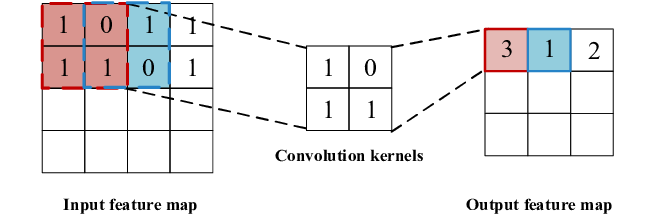

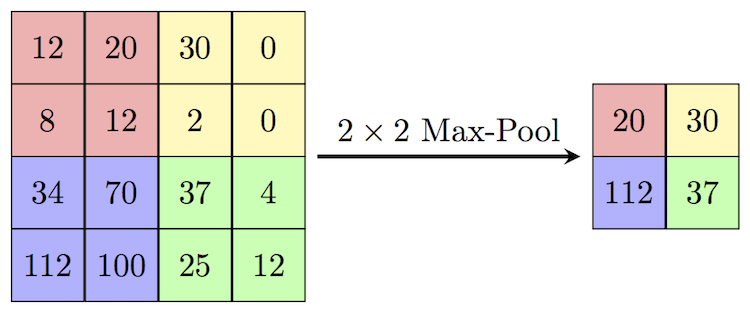

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3) , activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [21]:
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']) 

In [22]:
history = model.fit(train_generator, epochs=20, verbose=1,
                    validation_data=validation_generator)

Epoch 1/20
98/98 [==============================] - 114s 1s/step - loss: 0.6377 - accuracy: 0.6179 - val_loss: 0.5746 - val_accuracy: 0.7045
Epoch 2/20
98/98 [==============================] - 159s 2s/step - loss: 0.5421 - accuracy: 0.7272 - val_loss: 0.5417 - val_accuracy: 0.7307
Epoch 3/20
98/98 [==============================] - 198s 2s/step - loss: 0.5108 - accuracy: 0.7537 - val_loss: 0.5128 - val_accuracy: 0.7479
Epoch 4/20
98/98 [==============================] - 171s 2s/step - loss: 0.4521 - accuracy: 0.7885 - val_loss: 0.4775 - val_accuracy: 0.7826
Epoch 5/20
98/98 [==============================] - 151s 2s/step - loss: 0.4132 - accuracy: 0.8181 - val_loss: 0.5352 - val_accuracy: 0.7464
Epoch 6/20
98/98 [==============================] - 145s 1s/step - loss: 0.3885 - accuracy: 0.8269 - val_loss: 0.4449 - val_accuracy: 0.8005
Epoch 7/20
98/98 [==============================] - 143s 1s/step - loss: 0.3503 - accuracy: 0.8492 - val_loss: 0.4719 - val_accuracy: 0.7926
Epoch 8/20
98

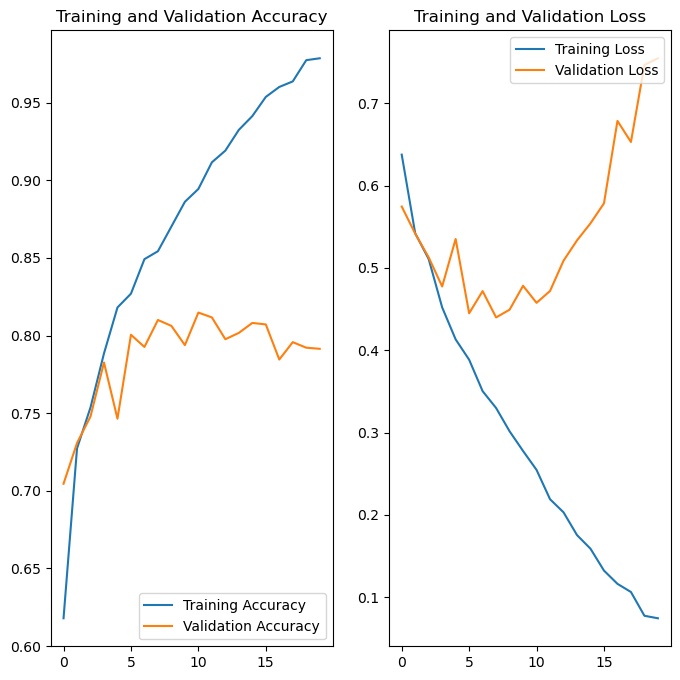

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
def predict(src):
    test = Image.open(os.path.join(data_path, src))
    test = test.resize((150, 150))
    display(test)

    test = np.asarray(test)
    test = test / 255

    prediction = model.predict([tf.expand_dims(test,0)])

    if prediction < 0.5:
        print('cat', prediction)
    else:
        print('dog', prediction)
    

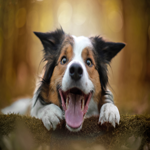

1/1 [==============================] - 0s 24ms/step
dog [[0.95111525]]


In [53]:
predict('d2.jpg')